In [1]:
# Social_Network_Ads.csv

# Importing the libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Import the dataset

In [9]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
labelen = LabelEncoder() 
dataset['Gender'] = labelen.fit_transform(dataset['Gender'])

# Prepare the dataset

In [13]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into a training set and a test set:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the Random Forest classifier to the training set:

In [16]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predict the test set results

In [18]:
y_pred = classifier.predict(X_test)

# Create a confusion matrix to evaluate the model's performance

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[47  5]
 [ 2 26]]


# Visualize the training set results

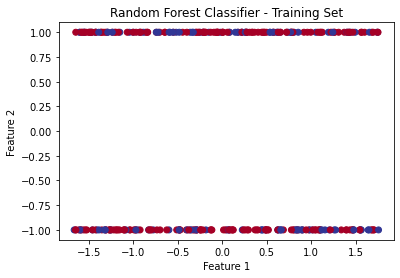

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Classifier - Training Set')
plt.show()

# Visualize the test set results

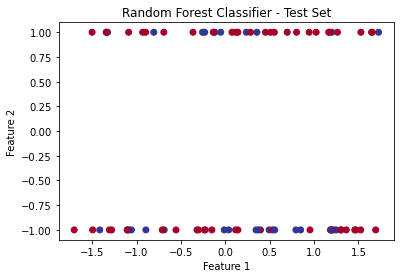

In [21]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Classifier - Test Set')
plt.show()

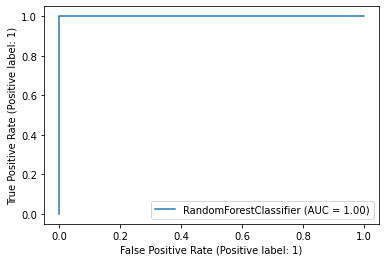

In [23]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(classifier, X_train,y_train)
     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


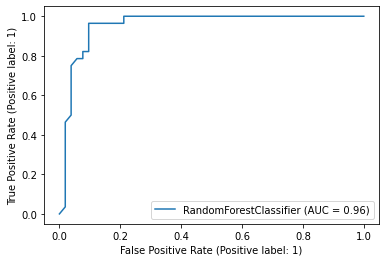

In [24]:

plot_roc_curve(classifier, X_test,y_test)